# Ford GoBike System Data
## by Moataz Alsharqawy

## Investigation Overview

> In this investigation, I will look at the age of riders and the duration that they can achieve  The main focus was on the start time duration and age, the time (weekday, hour), and age for gender.

## Dataset Overview

> in this dataset of ford GoBike System Data , we have more than 650,000+ individual trip records with 18 variables collected, such as time (duration, start & end time, and day of weak ), user age and gender, and station location.
this data collected in 2020-4 in New York City.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('202004-citibike-tripdata.csv')


In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,534,2020-04-01 00:00:15.2800,2020-04-01 00:09:09.8730,3656,E 2 St & Avenue A,40.723077,-73.985836,545,E 23 St & 1 Ave,40.736502,-73.978095,15162,Subscriber,1990,2
1,529,2020-04-01 00:02:28.9430,2020-04-01 00:11:18.3410,3163,Central Park West & W 68 St,40.773407,-73.977825,3301,Columbus Ave & W 95 St,40.791956,-73.968087,42861,Subscriber,1974,1
2,1488,2020-04-01 00:02:56.0900,2020-04-01 00:27:44.2530,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3605,31 Ave & Crescent St,40.765835,-73.926547,35989,Subscriber,1982,1
3,341,2020-04-01 00:03:25.1410,2020-04-01 00:09:06.3190,3827,Halsey St & Broadway,40.685650,-73.915640,3869,Van Buren St & Broadway,40.692000,-73.926170,37548,Subscriber,1996,1
4,2206,2020-04-01 00:05:35.2790,2020-04-01 00:42:21.9080,3890,Grove St & Broadway,40.690470,-73.923511,3058,Lewis Ave & Kosciuszko St,40.692371,-73.937054,39701,Subscriber,1977,1


In [4]:
df.rename(columns={"starttime": "start_time",
                   "stoptime": "end_time",
                  "start station id": "start_station_id",
                  "start station name": "start_station_name",
                  "start station latitude": "start_station_latitude",
                  "start station longitude": "start_station_longitude",
                  "end station id": "end_station_id",
                  "end station name": "end_station_name",
                  "end station latitude": "end_station_latitude",
                  "end station longitude": "end_station_longitude",
                  "bikeid": "bike_id",
                  "birth year": "birth_year",
                  "tripduration": "trip_duration_sec",
                  "usertype": "user_type"},inplace=True)

In [5]:
# Change start_time and end_time to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [6]:
gobike = df.copy()

In [7]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682762 entries, 0 to 682761
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_sec        682762 non-null  int64         
 1   start_time               682762 non-null  datetime64[ns]
 2   end_time                 682762 non-null  datetime64[ns]
 3   start_station_id         682762 non-null  int64         
 4   start_station_name       682762 non-null  object        
 5   start_station_latitude   682762 non-null  float64       
 6   start_station_longitude  682762 non-null  float64       
 7   end_station_id           682762 non-null  int64         
 8   end_station_name         682762 non-null  object        
 9   end_station_latitude     682762 non-null  float64       
 10  end_station_longitude    682762 non-null  float64       
 11  bike_id                  682762 non-null  int64         
 12  user_type       

In [8]:
# change the dtype to string 
gobike['gender'] = gobike['gender'].astype(str)

# now change Recoding categorical gender numeric into variable
gobike['gender'] = gobike['gender'].str.replace('0', 'unknown')
gobike['gender'] = gobike['gender'].str.replace('1', 'male')
gobike['gender'] = gobike['gender'].str.replace('2', 'female')

In [9]:
gobike['duration_min'] = gobike['trip_duration_sec']/60

In [10]:
gobike['User_age']= 2020 - gobike.birth_year
gobike.User_age.describe()

count    682762.000000
mean         40.140963
std          12.235537
min          16.000000
25%          30.000000
50%          37.000000
75%          51.000000
max         135.000000
Name: User_age, dtype: float64

In [11]:
gobike = gobike[gobike['User_age'] <= 70]

In [12]:
gobike['start_time_hour']= gobike['start_time'].dt.hour

In [13]:
#this method Returns the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6 
gobike['start_time_dayofweek'] = gobike.start_time.dt.dayofweek

# change Data type of the columne to object 
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].astype(str)

# now we will change these numbers to name of the days  
# Monday=0, Tuesday=1, Wednesday=2 Thursday=3, Friday=4, Saturday=5, Sunday=6
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('0', 'Monday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('1', 'Tuesday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('2', 'Wednesday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('3', 'Thursday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('4', 'Friday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('5', 'Saturday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('6', 'Sunday')


In [14]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676033 entries, 0 to 682761
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_sec        676033 non-null  int64         
 1   start_time               676033 non-null  datetime64[ns]
 2   end_time                 676033 non-null  datetime64[ns]
 3   start_station_id         676033 non-null  int64         
 4   start_station_name       676033 non-null  object        
 5   start_station_latitude   676033 non-null  float64       
 6   start_station_longitude  676033 non-null  float64       
 7   end_station_id           676033 non-null  int64         
 8   end_station_name         676033 non-null  object        
 9   end_station_latitude     676033 non-null  float64       
 10  end_station_longitude    676033 non-null  float64       
 11  bike_id                  676033 non-null  int64         
 12  user_type       

## Ride Duration Time 

The original duration data has the right skew issue 
We have to do some data transformation to make data visualization and data interpretation easier. Below are the plots before/after data transformation

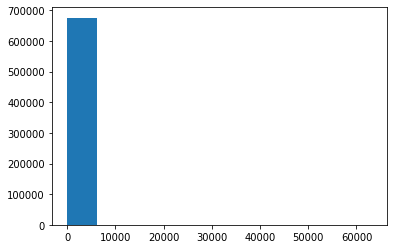

In [15]:
plt.hist(data=gobike, x='duration_min');

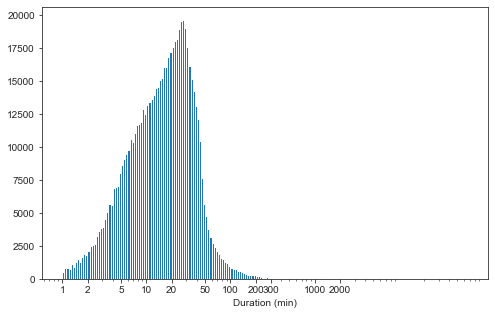

In [16]:
bins = 10 ** np.arange(0, np.log10(gobike['duration_min'].max())+0.025, 0.025)
sb.set_style('ticks')
plt.figure(figsize=[8, 5]);
plt.hist(data = gobike, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 300, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 300, 1000, 2000]);
plt.xlabel('Duration (min)');

In [17]:
gobike = gobike[gobike['duration_min'] <= 300]

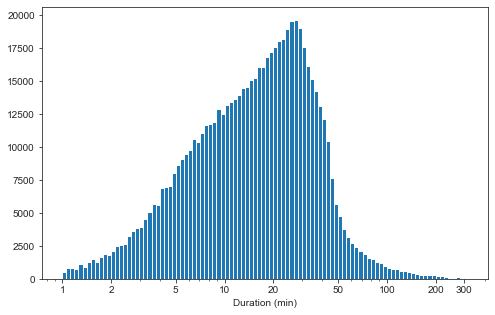

In [18]:
bins = 10 ** np.arange(0, np.log10(gobike['duration_min'].max())+0.025, 0.025)

plt.figure(figsize=[8, 5]);
plt.hist(data = gobike, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 300], [1, 2, 5, 10, 20, 50, 100, 200, 300]);
plt.xlabel('Duration (min)');

## Ride Duration Time with age 
Features investigated include the following: Start Time Hour, Start Time DayofWeek, Gender, age, and duration (min) 

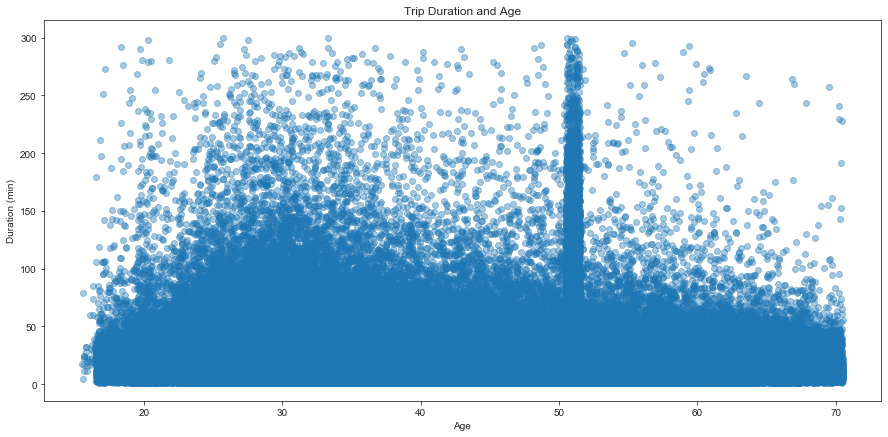

In [19]:
plt.figure(figsize=[15,7]);
sb.regplot(data = gobike, x = 'User_age', y = 'duration_min', fit_reg = False,
           x_jitter = 0.5, y_jitter = 0.5, scatter_kws = {'alpha' : 0.4});


plt.title('Trip Duration and Age');
plt.xlabel('Age');
plt.ylabel('Duration (min)');

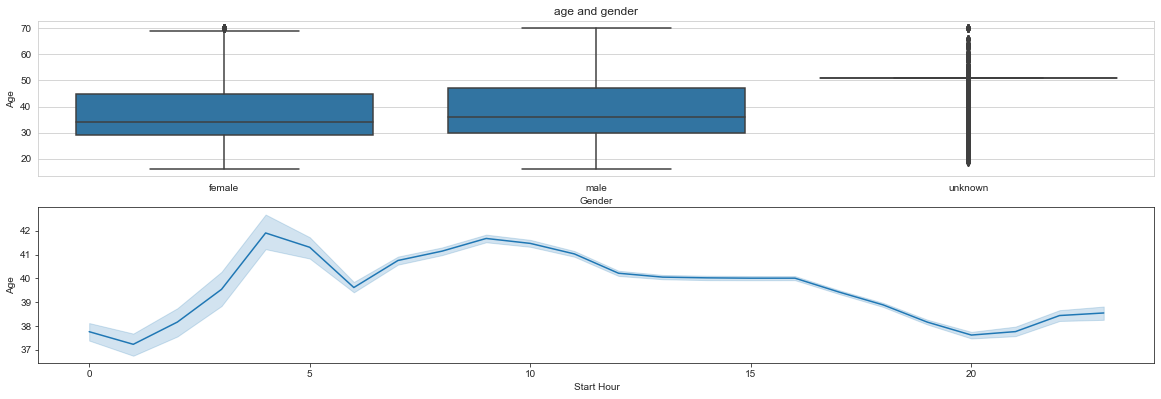

In [20]:
plt.figure(figsize=[20,20]);

sb.set_style("whitegrid")
plt.subplot(6, 1, 1);

base_color = sb.color_palette()[0]
sb.boxplot(data = gobike, x = 'gender', y = 'User_age',color=base_color);

plt.title('age and gender');
plt.xlabel('Gender');
plt.ylabel('Age');

sb.set_style("ticks");
plt.subplot(6, 1, 2);


base_color = sb.color_palette()[0]
sb.lineplot(x = gobike['start_time_hour'] , y = gobike['User_age'], color=base_color);
plt.ylabel('Age');
plt.xlabel('Start Hour');

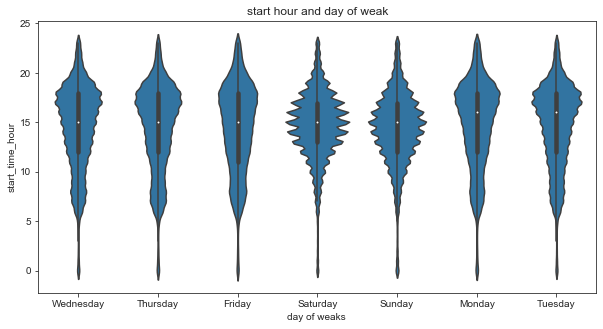

In [21]:
plt.figure(figsize=[10,5]);

sb.set_style("ticks");
base_color = sb.color_palette()[0]

sb.violinplot(x = gobike['start_time_dayofweek'], y = gobike['start_time_hour'],color= base_color);

plt.title('start hour and day of weak');
plt.xlabel('day of weaks ');

## Ride Duration (min) for different gender with age and user type 
I consider that the normal trip duration of any users need is 75 min so we will count after 75 min to see which gender ride a bike for long trip duration

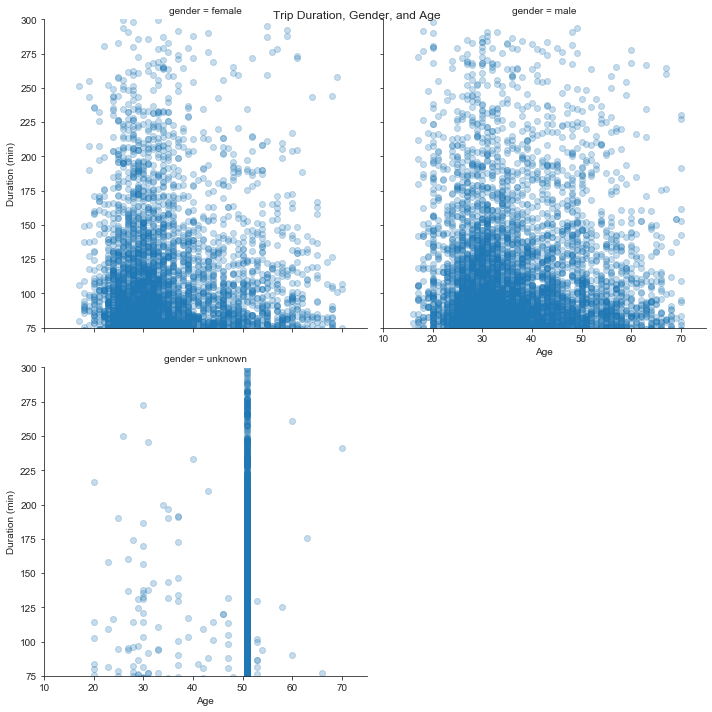

In [22]:
gender = sb.FacetGrid(data = gobike, col = 'gender', col_wrap = 2, size = 5,
                 xlim = [10, 75], ylim = [75, 300])
gender.map(plt.scatter, 'User_age', 'duration_min', alpha= 0.25)


gender.set_xlabels('Age')
gender.set_ylabels('Duration (min)')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

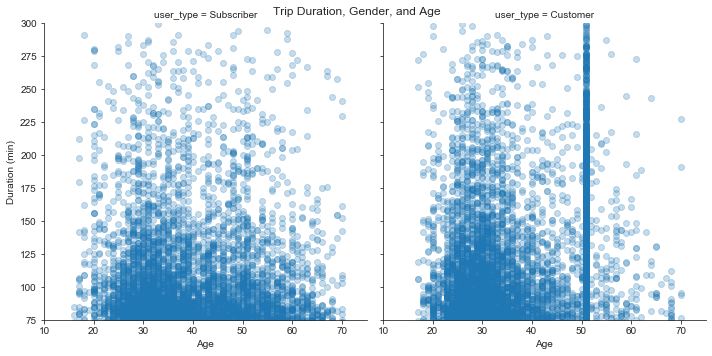

In [23]:
gender = sb.FacetGrid(data = gobike, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 75], ylim = [75, 300])
gender.map(plt.scatter, 'User_age', 'duration_min', alpha= 0.25)


gender.set_xlabels('Age')
gender.set_ylabels('Duration (min)')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

In [24]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [25]:
!jupyter nbconvert slide_deck_Ford_GoBike.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_Ford_GoBike.ipynb to slides
[NbConvertApp] Writing 1084501 bytes to slide_deck_Ford_GoBike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\me-ra\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\me-ra\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\me-ra\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\me-ra\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\me-ra\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)

# thank you. 